<a href="https://colab.research.google.com/github/JaejunHaa/AIB_Project/blob/main/n232a_data_wrangling_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 2*

# 📝 Assignment
---
# Data Wrangling


In [1]:
# ! pip install -U pandas-profiling
# ! pip install --upgrade scikit-learn
# ! pip install --upgrade category_encoders
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1) 지속적으로 여러분의 포트폴리오 데이터를 랭글링 하세요
- 여러분이 선택한 데이터들을 랭글링하여 모델을 만들기 위한 테이블 형태의 데이터로 만들어 보세요.
- **다음 함수의 result를 완성시키고 리턴값을 과제 제출폼에 제출하세요.**

In [3]:
### 이곳에서 제출폼 과제를 진행해 주세요 ###
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/assignments/purchase_data.csv", sep=",",index_col=0)

df.head()

,SN,Age,Gender,Item ID,Item Name,Price
Purchase ID,,,,,,
0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,Ithergue48,24,Male,92,Final Critic,4.88
3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,Iskosia90,23,Male,131,Fury,1.44


In [4]:
## 다음 result 함수 안에 male, female 변수를 계산하세요.(groupby, get_group을 사용하세요.)
## sum_male: Age = 20, Gender = "Male" 그룹의 Price를 합하세요.
## sum_female: Age = 20, Gender = "Female" 그룹의 Price를 합하세요.

def result(df):

    sum_male = df.groupby(['Gender', 'Age']).get_group(('Male', 20)).Price.sum()
    sum_female = df.groupby(['Gender', 'Age']).get_group(('Female', 20)).Price.sum()

    print("sum_male: {}, sum_female: {}".format(sum_male, sum_female))
    return round(sum_male + sum_female)

result(df)

sum_male: 260.2, sum_female: 43.730000000000004


304

In [5]:
# 데이터 불러오기 - 신용카드 사용자들의 데이터 from kaggle
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/n23x/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/n23x/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/n23x/sample_submission.csv')

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

In [7]:
# 카드 흥미 여부에 따른 평균 잔고
lead_bal = train.groupby('Is_Lead').Avg_Account_Balance.mean()
lead_bal

Is_Lead
0    1.103018e+06
1    1.210034e+06
Name: Avg_Account_Balance, dtype: float64

In [8]:
# 카드 흥미 여부에 따른 평균 거래 개월수
lead_vint = train.groupby('Is_Lead').Vintage.mean()
lead_vint

Is_Lead
0    41.913923
1    63.183074
Name: Vintage, dtype: float64

In [9]:
# 신용 상품 보유 여부 및 active customer 여부에 따른 평균 잔고 확인
credit_act_bal = train.groupby(['Credit_Product', 'Is_Active']).Avg_Account_Balance.mean()
credit_act_bal

Credit_Product  Is_Active
No              No           1.013871e+06
                Yes          1.169270e+06
Yes             No           1.146595e+06
                Yes          1.286995e+06
Name: Avg_Account_Balance, dtype: float64

In [10]:
# 성별과 직업에 따른 평균 잔고 확인
gender_occup_bal = train.groupby(['Gender', 'Occupation']).Avg_Account_Balance.mean()
gender_occup_bal

Gender  Occupation   
Female  Entrepreneur     1.451080e+06
        Other            1.183740e+06
        Salaried         1.000960e+06
        Self_Employed    1.145293e+06
Male    Entrepreneur     1.393871e+06
        Other            1.229869e+06
        Salaried         1.072863e+06
        Self_Employed    1.122950e+06
Name: Avg_Account_Balance, dtype: float64

### 2) 새로 특징들을 만들어 보세요
- 여러분이 선택한 데이터에서 특징 공학을 수행해 보세요.
- **(다중선택) purchase_data를 랭글링하여 다음 조건을 계산하고 결과가 올바른 항목만 과제 제출폼에 제출하세요.**
    1. 나이 1-20세 그룹(20세 포함)의 평균 Price는 3.101818이다.
    2. 나이 21-50세 그룹의 평균 Price는 3.021559이다.
    3. 가장 많이 구입한 아이템의 ID는 178 이다.
    4. 두번째로 매출을 많이 낸 아이템 ID는 145이다.

In [11]:
# Age colulmn 확인
df['Age'].describe()

count    780.000000
mean      22.714103
std        6.659444
min        7.000000
25%       20.000000
50%       22.000000
75%       25.000000
max       45.000000
Name: Age, dtype: float64

In [12]:
# 그룹별 Price 평균
mean_age_20 = df.groupby((df['Age']<=20)).Price.mean()[True]
mean_age_50 = df.groupby((df['Age']<=20)).Price.mean()[False]

print(f'나이 1-20세 그룹(20세 포함)의 평균 Price: {round(mean_age_20, 6)}')
print(f'나이 21-50세 그룹(20세 포함)의 평균 Price: {round(mean_age_50, 6)}')

# 판매수 상위 Item ID
best_item = df.groupby('Item ID')['Item Name'].count().sort_values(ascending=False).index[0]

print(f'가장 많이 구입한 아이템의 ID: {best_item}')

# 매출 상위 Item IDs
best_sales = df.groupby('Item ID').Price.sum().sort_values(ascending=False).index[1]

print(f'두번째로 매출을 많이 낸 아이템 ID: {best_sales}')

나이 1-20세 그룹(20세 포함)의 평균 Price: 3.101818
나이 21-50세 그룹(20세 포함)의 평균 Price: 3.021559
가장 많이 구입한 아이템의 ID: 178
두번째로 매출을 많이 낸 아이템 ID: 82


In [13]:
target = 'Is_Lead'

In [14]:
# 중복값 확인
train.duplicated().sum()

0

In [15]:
# 타겟의 비율 확인
train[target].value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [16]:
# 데이터 나누기 - 시계열이 있는 데이터가 아니므로 무작위로 나눔
from sklearn.model_selection import train_test_split

# 테스트 데이터
X_test = test

# 훈련/검증 데이터
train, val = train_test_split(train, test_size=0.2, random_state=2)

train.shape, val.shape, test.shape

((196580, 11), (49145, 11), (105312, 10))

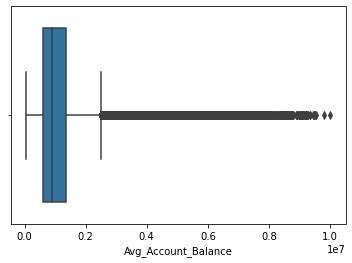

In [17]:
# Avg_Account_Balance 특성의 이상치 확인
sns.boxplot(x = train['Avg_Account_Balance']);

In [18]:
# 데이터 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler
def preprocess(df) :

  # Avg_Account_Balance 변수의 이상치 제거
  df['Avg_Account_Balance'] = df[df['Avg_Account_Balance'] < np.percentile(df['Avg_Account_Balance'], 95)]['Avg_Account_Balance']

  # 결측치의 경우 0으로 대체
  df['Credit_Product'].replace(np.nan, 0, inplace=True)
  df['Avg_Account_Balance'].replace(np.nan, 0, inplace=True)

  # Yes/No를 1/0으로 대체
  df = df.replace('No', 0)
  df = df.replace('Yes', 1)

  #  Male/Female을 1/0으로 대체
  df = df.replace('Female', 0)
  df = df.replace('Male', 1)

  # One-hot encoding
  col_ohe=['Occupation', 'Channel_Code', 'Region_Code']
  df=pd.get_dummies(data=df,columns=col_ohe)

  #Standard Scaling
  col_ss=['Age', 'Vintage', 'Avg_Account_Balance']
  df[col_ss]=StandardScaler().fit_transform(df[col_ss])

  return df

train = preprocess(train)
val = preprocess(val)

In [19]:
# Feature Engineering
def engineer(df):
    
  # 타겟 변수와 관계 없는 ID 특성 삭제
  df = df.drop(['ID'], axis=1)
  
  return df

train = engineer(train)
val = engineer(val)

train

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
87862,1,0.414756,1.422066,1,-0.493293,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22078,1,0.752040,1.978491,1,-0.109986,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39976,0,-0.394724,-0.618158,0,-1.028678,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29631,0,0.144930,0.309217,0,1.073263,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
158849,1,-0.597094,-1.020020,0,0.192076,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175638,0,-1.001834,-0.432683,0,-0.444006,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95816,0,-0.057440,0.432867,1,-0.216179,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203245,1,0.684583,2.349441,1,-0.847476,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100879,1,-1.339117,-0.989107,0,1.555640,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 🔥 도전과제

### 3) 조금 부족하더라도 최소한의 랭글링으로 데이터를 준비하여 간단한 모델을 학습시켜 보세요
- 여러분들이 선택한 데이터를 가지고 간단한 모델을 학습하고 결과를 리포팅 합니다.

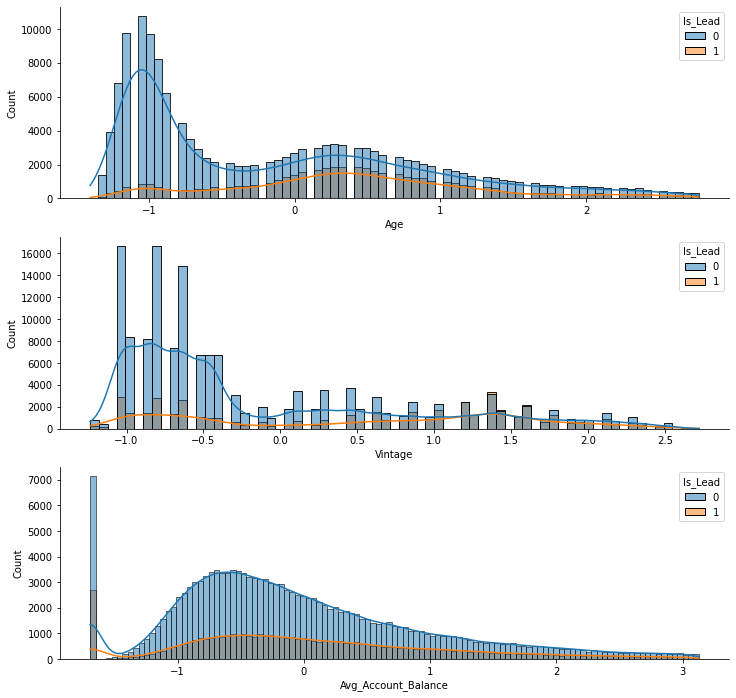

In [21]:
# Numerical feature와 target 분포 시각화
plt.figure(figsize=(12, 12))

for i, feature in enumerate(num_features):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=train, x=feature, hue="Is_Lead", kde=True)
    
sns.despine()

*   target에 대해 age, vintage feature는 연관성을 띄는 것으로 보인다.

In [22]:
# Model 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

features_train = train.columns.drop([target])
features_val = val.columns.drop([target])

X_train = train[features_train]
y_train = train[target]
X_val = val[features_val]
y_val = val[target]

randomfo = RandomForestClassifier(n_jobs=-1, random_state=2, oob_score=True, 
                           max_depth=11, class_weight='balanced')

randomfo.fit(X_train, y_train)
print('Training accuracy: ', randomfo.score(X_train, y_train))
print('Validation accuracy: ', randomfo.score(X_val, y_val))

y_val_pred = randomfo.predict(X_val)
print('Validation accuracy(f1_score):', f1_score(y_val, y_val_pred))

print(classification_report(y_val, randomfo.predict(X_val)))

Training accuracy:  0.6941957472784617
Validation accuracy:  0.685888696713806
Validation accuracy(f1_score): 0.5357991279506842
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     37593
           1       0.41      0.77      0.54     11552

    accuracy                           0.69     49145
   macro avg       0.66      0.72      0.65     49145
weighted avg       0.79      0.69      0.71     49145


















*   One-hot encoding, Standard Scaling 추가, 이상치를 제거하는 전처리를 진행하고 RandomForestClassifier로 모델을 바꾸어 타겟의 불균형도 보정하여 학습했으나 n231에 비해 오히려 정확도가 떨어졌다.
*   High cardinality를 가지는 Region_Code도 단순히 One-hot encoding하는 등으로 정확도는 낮아졌으나, 재현율과 f1 score는 높아졌다. 
*   타겟을 잘 설명할 수 있는 새로운 특성을 생성, 평가 모델 개선 등의 추가적인 작업이 필요하다.